<a href="https://colab.research.google.com/github/amanksharma23/Credit_card_default_prediction/blob/main/Credit_card_defaulter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients.


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
#Importing necessary libraries to work with
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Importing the Logistic regression model 
from sklearn.linear_model import LogisticRegression

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [ ]:
#Mounting drive to collab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the necessary data to work with 
file_path = '/content/drive/MyDrive/Credit defaulter/default of credit card clients.xls.xlsx'

In [ ]:
df = pd.read_excel(file_path)

In [ ]:
#Getting brief about the data
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
#Gettng a statistical inference for the data
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
#A brief about all the column present
print(df.columns)
print(df.info())

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-nul

From the columns we can identify that that our target column y (The column that needs to be predicted) will be "default payment next month" and the rest would be our feature column. Except for the "ID" column why because it is a primary key and is unique for every row and act as an another index. So it will not be necessary to take that column in our model.

Text(0.5, 1.0, 'Correlation')

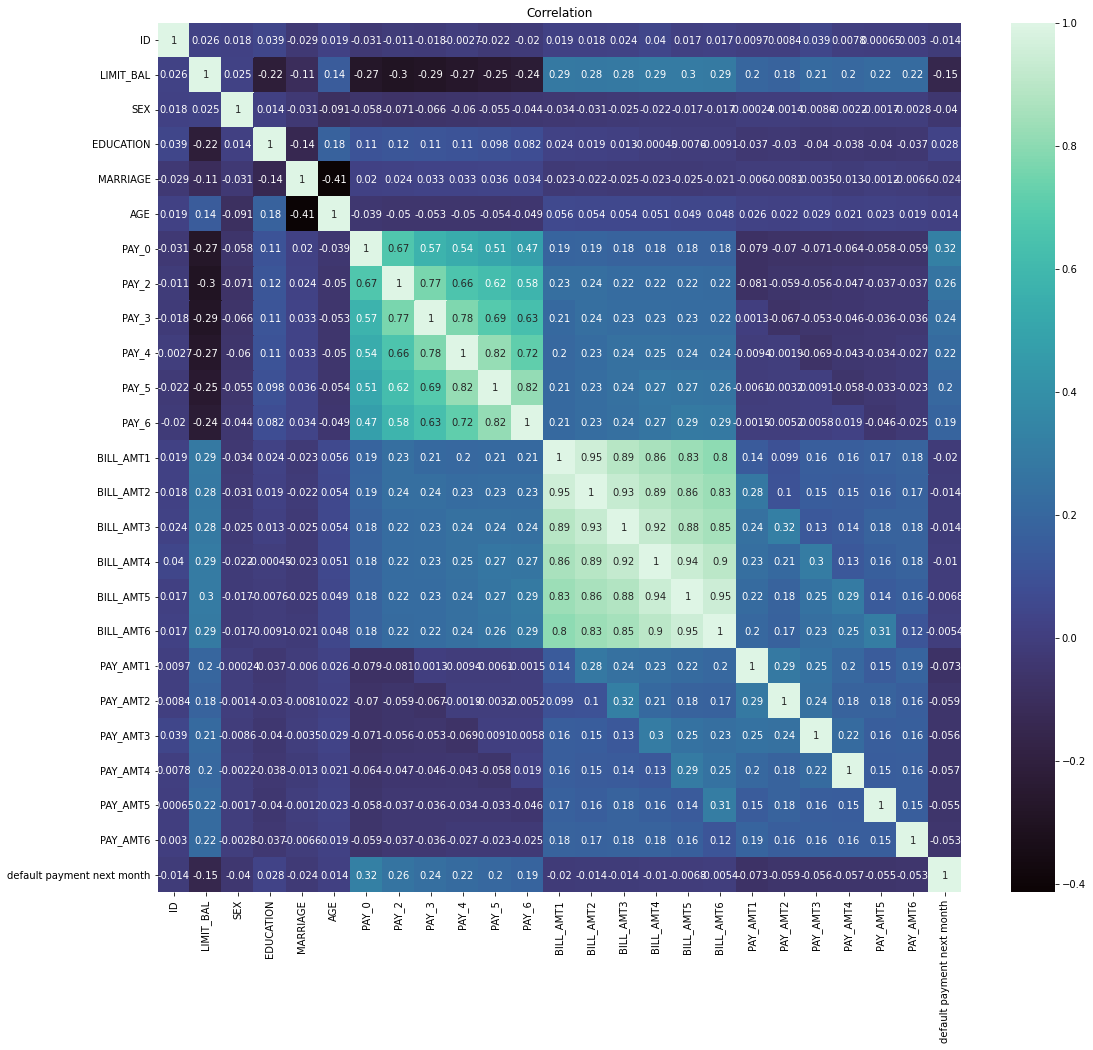

In [ ]:
#plotting a correlation heat map
corr = df.corr()
plt.figure(figsize = (18,16))
sns.heatmap(corr, annot = True, cmap ='mako')
plt.title('Correlation')

From the correlation heat map we can infer that the payment columns and bill amount columnts are positively correlated. And that makes sense because if a person has delayed his/her payment of one month then obviously all the payments will be delayed.

In [ ]:
#Getting the unique values for each of education and marriage column
print(df['EDUCATION'].unique())
print(df['MARRIAGE'].unique())

[2 1 3 5 4 6 0]
[1 2 3 0]


In the Education column we are having 6 unique values from 0 to 6 where each value is having a specify a certain level of education (1 = graduate school; 2 = university; 3 = high school; 4 = others) and same goes for the Marital status column (1 = married; 2 = single; 3 = others) and we dont want our model to infer that the 3 is gretaer than 2  because it does not make any sense in both of these columns.

So we will be performing one hot encoding for these two columns.

## Moving towards the preprocessing part:
1. Now because of some nominal features that are present in our data set, we will be doing one hot encoding and further concating both of the data.

2. After that we will be focuing on creating our X and y set of data.

3. And then training.

In [ ]:
#Onehot encoding
edu = pd.get_dummies(df['EDUCATION'], prefix= 'EDU')
mar = pd.get_dummies(df['MARRIAGE'], prefix= 'MAR')

#Concating the dummies dataframe with our datset
df =  pd.concat([df, edu, mar],axis =1 )
df = df.drop(['ID','EDUCATION', 'MARRIAGE'],axis =1)

#Creating X and y dataframes 
X = df.drop(['default payment next month'], axis =1)
y = df['default payment next month']


In [ ]:
#creating data frames for train test split
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.7, random_state= 123)

Now coming down to the prediction part we will be using both Regression as well as the classification model to predict the data and later we will be checking which of the model gives us the higher accuracy.

1. For the regression model we will be using **Logistic Regression Algothrim.**

2. And for the classifier we will be using **Decision Tree Algothrimn.**

## Training

In [ ]:
#Creating a function to create model as well as predict data
def create_model_predict (X_train,y_train,X_test):
    #creating models
    lgr = LogisticRegression()
    clf = DecisionTreeClassifier()

    #fitting the training set in the models
    lgr.fit(X_train,y_train)
    clf.fit(X_train,y_train)

    #prediction of the data
    y_pred_lgr = lgr.predict(X_test)
    y_pred_clf = clf.predict(X_test)
    
    return y_pred_lgr, y_pred_clf, lgr, clf

##Prediction

In [ ]:
#created dataframes for prediction and model
y_pred_lgr, y_pred_clf, log_mod, dt_mod = create_model_predict(X_train,y_train,X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##Checking the accuracy of the model

In [ ]:
#Checking the accuracy of both the models
print('Logistic_regression_accurcay' + ": {:.2f}%".format(log_mod.score(X_test, y_test) * 100))
print("Decision_tree_accurcay " + ": {:.2f}%".format(dt_mod.score(X_test, y_test) * 100))

Logistic_regression_accurcay: 78.02%
Decision_tree_accurcay : 72.54%
